#                                  Chapter 7:        
# DATA CLEANING AND PREPARATION

In [1]:
import pandas  as pd, numpy as np
from numpy import nan as NA

# 7.1 Handling Missing Data

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

###### isna( ) and isnull( ) both works same . 

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [4]:
string_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

###### The built-in Python None value is also treated as NA in object arrays:

In [5]:
string_data[0] = None
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

###### Cross Checking whether None is treating as NAN or not .

In [6]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

###  List of some functions related to missing data handling.

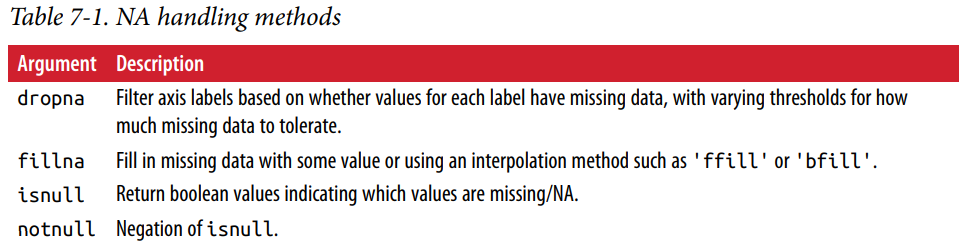


### a) Filtering Out Missing Data :

While you always have the option to do it by hand using pandas.isnull and boolean indexing, the dropna can be helpful.On a Series, it returns the Series with only the non-null data and index values:

In [12]:
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [24]:
#Both are equivalent 

print("After applying dropna\n")
print(data.dropna())
print("\n\nAfter applying data[data.notnull()]\n")
print(data[data.notnull()])


After applying dropna

0    1.0
2    3.5
4    7.0
dtype: float64


After applying data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64


###### Note :  
###### ` dropna won't put effect on the original series. `

###### ` dropna by default drops any row containing a missing value`

With DataFrame objects, things are a bit more complex. You may want to drop rows
or columns that are all NA or only those containing any NAs. dropna by default drops
any row containing a missing value:


In [2]:
df = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
df

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [4]:
df.dropna()

,0,1,2
0,1.0,6.5,3.0


###### ` Passing how ='all' will only drop rows that are all NA`

In [7]:
df.dropna(how='all')   # It has dropped 3rd row only because it has all NAN values

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


###### ` To drop columns in the same way, pass axis=1`

In [12]:
df.dropna(axis=1)  #Dropped all because every column contains one or more NAN values

""
0
1
2
3


In [3]:
df[4] = NA
df

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [16]:
df.dropna(axis=1 , how = 'all') # Dropped only 4th column because it has all NAN .

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [4]:
df

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


>A related way to filter out DataFrame rows tends to concern time series data. Suppose
you want to keep only rows containing a certain number of observations. You can
indicate this with the thresh argument

###### How does THRESH work ?
Ans : if you set the value of thresh - 3 , then it will start dropping NAN rows from max to min, In         this dataframe it will drop 3 rows from 4 NAN values to 2



In [6]:
df.dropna(thresh=3)

,0,1,2,4
0,1.0,6.5,3.0,NaN


In [7]:
df.dropna(thresh=2)

,0,1,2,4
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


### b) Filling In Missing Data :

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. For most purposes, the fillna method is the workhorse function to use. Calling fillna with a constant replaces missing values with that value.

###### ` Note : fillna doesn't put effect on original dataframe `

In [28]:
df

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [34]:
df.fillna(0)

,0,1,2,4
0,1.0,6.5,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,6.5,3.0,0.0


###### ` Calling fillna with a dict, you can use a different fill value for each column:`

In [37]:
df.fillna({1: 0.5, 2: 0})


,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,0.5,0.0,NaN
2,NaN,0.5,0.0,NaN
3,NaN,6.5,3.0,NaN


###### fillna returns a new object, but you can modify the existing object in-place:

In [47]:
df

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [48]:
df.fillna(0 , inplace=True)

In [49]:
df

,0,1,2
0,1.0,6.5,3.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,6.5,3.0


In [59]:
df = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
df

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [66]:
df.fillna(method='ffill') # ffill will fill NaN from top rows 

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


In [69]:
# By setting the limit to 1 , it will fill only 1 NaN from each row (from the top)

df.fillna(method='ffill' , limit = 1)   

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,NaN,NaN
3,NaN,6.5,3.0


###### With fillna you can do lots of other things with a little creativity. For example, you might pass the mean or median value of a Series:

In [55]:
data = pd.Series([1., NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [58]:
data.fillna(data.mean())  # (1+3.5+7) / 3 =   3.833333

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

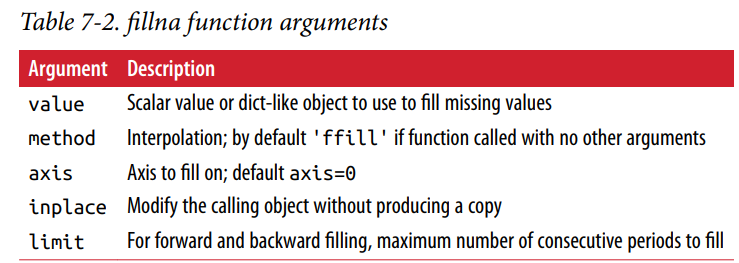

# 7.2 Data Transformation

### a) Removing Duplicates :

Duplicate rows may be found in a DataFrame for any number of reasons. Here is an example:


In [19]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


###### The DataFrame method duplicated returns a boolean Series indicating whether each row is a duplicate (has been observed in a previous row) or not

In [24]:
data.duplicated()    # It will consider duplicate in pair of columns

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

###### drop_duplicates returns a DataFrame where the duplicated array is False or The values that are not duplicate. 

In [14]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


###### Note :
`Both of these methods by default consider all of the columns; alternatively, you can specify any subset of them to detect duplicates `

In [20]:
data.drop_duplicates(['k2'])

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


###### POINT TO REMEMBER :

`duplicated and drop_duplicates by default keep the first observed value combination.Passing keep='last' will return the last one`

In [23]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [25]:
# keep='last' will consider the unique values from the last rows and remove duplicate from above 
data.drop_duplicates(['k1'], keep='last')

,k1,k2
4,one,3
6,two,4


### b) Transforming Data Using a Function or Mapping

In [26]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon','Pastrami', 'corned beef', 'Bacon',
  'pastrami', 'honey ham', 'nova lox'],'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})


In [27]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Suppose you wanted to add a column indicating the type of animal that each food came from. Let’s write down a mapping of each distinct meat type to the kind of animal:


In [28]:
meat_to_animal = {
 'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'
}

###### POINT TO REMEMBER :
`The map method on a Series accepts a function or dict-like object containing a mapping `, but here we have a small problem in that some of the meats are capitalized and others are not. Thus, we need to convert each value to lowercase using the `str.lower` Series method

In [34]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [35]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [39]:
data['animal'] = lowercased.map(meat_to_animal)
data


,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


We could also have passed a function that does all the work :

In [40]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

###### POINT TO REMEMBER :
`Using map is a convenient way to perform element-wise transformations and other data cleaning–related operations`

### c) Replacing Values

###### POINT TO REMEMBER :
`Filling in missing data with the fillna method is a special case of more general value replacement. As you’ve already seen, map can be used to modify a subset of values in an object but replace provides a simpler and more flexible way to do so.`

In [41]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

##### The -999 values might be sentinel values for missing data. To replace these with NA values that pandas understands, we can use replace ,
`producing a new Series (unless you pass inplace=True)`

In [49]:
data.replace(-999, np.nan)


0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [51]:
''' If you want to replace multiple values at once, you instead pass a list and then the 
substitute value '''

data.replace([-999,-1000], np.nan)


0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [52]:
# To use a different replacement for each value, pass a list of substitutes

data.replace([-999,-1000 , 1], [np.nan,0,12000])

0    12000.0
1        NaN
2        2.0
3        NaN
4        0.0
5        3.0
dtype: float64

In [54]:
# The argument passed can also be a dict
data.replace({-999:np.nan,-1000:0 , 1:12000})

0    12000.0
1        NaN
2        2.0
3        NaN
4        0.0
5        3.0
dtype: float64

### c) Renaming Axis Indexes 

Like values in a Series, axis labels can be similarly transformed by a function or mapping of some form to produce new, differently labeled objects. You can also modify the axes in-place without creating a new data structure

In [24]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


###### Like a Series, the axis indexes have a map method.

In [25]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [26]:
transform

<function __main__.<lambda>(x)>

In [27]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


###### You can assign to index as well, modifying the DataFrame in-place:


In [31]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


###### POINT TO REMEMBER :

`If you want to create a transformed version of a dataset without modifying the original, a useful method is "rename" `

In [50]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [51]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


###### Notably, rename can be used in conjunction with a dict-like object providing new values for a subset of the axis labels

In [52]:
data.rename(index={'OHIO': 'INDIANA'},columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [53]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


###### POINTS TO REMEMBER :
`rename saves you from the chore of copying the DataFrame manually and assigning to its index and columns attributes. Should you wish to modify a dataset in-place,pass inplace=True`

In [54]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### d) Discretization and Binning(or Bucketing) 

###### POINT TO REMEMBER :
` discretization functions are especially useful for quantile and group analysis.`

Continuous data is often discretized or otherwise separated into “bins” for analysis.
Suppose you have data about a group of people in a study, and you want to group
them into discrete age buckets

In [6]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Let’s divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older. To do so, you have to use cut, a function in pandas:


In [7]:
bins = [18, 25, 35, 60, 100]

###### Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

In [61]:
# It will take each element of age list and returns the intervals from which that element belong
# Here ages variable has 12 elements therefore we have recieved 12 intervals/ranges

cats = pd.cut(ages,bins) #where left value is exclusive and right one is inclusive
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

###### POINT TO REMEMBER :

`The object pandas returns is a special Categorical object. The output you see describes the bins computed by pandas.cut. You can treat it like an array of strings indicating the bin name; internally it contains a categories array specifying the distinct category names along with a labeling for the ages data in the codes attribute`

In [62]:
# We have created 4 bins from 18-25 , 25-35 , 35-60 and 60-100 . Each bin has a label from 0 to 4 .

cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [65]:
cats.categories   # 4 bins/buckets

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

###### NOTE : Note that pd.value_counts(cats) are the bin counts for the result of pandas.cut

In [69]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

###### POINT TO REMEMBER :

Consistent with mathematical notation for intervals, `a parenthesis means that the side is open (exclusive)`, while the `square bracket means it is closed (inclusive)`. You can change which side is closed by passing `right=False`

In [75]:
 pd.cut(ages, [18, 25, 36, 61, 100], right=False)

[[18, 25), [18, 25), [25, 36), [25, 36), [18, 25), ..., [25, 36), [61, 100), [36, 61), [36, 61), [25, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 36) < [36, 61) < [61, 100)]

In [73]:
ages

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

###### You can also pass your own bin names by passing a list or array to the labels option

In [76]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [77]:
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [78]:
pd.cut(ages, bins)

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [8]:
pd.cut(ages,4)

[(19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], ..., (30.25, 40.5], (50.75, 61.0], (40.5, 50.75], (40.5, 50.75], (30.25, 40.5]]
Length: 12
Categories (4, interval[float64]): [(19.959, 30.25] < (30.25, 40.5] < (40.5, 50.75] < (50.75, 61.0]]

###### POINT TO REMEMBER :
`If you pass an integer number of bins to cut instead of explicit bin edges, it will compute equal-length bins based on the minimum and maximum values in the data.`

`The precision=2 option limits the decimal precision to two digits.`

In [12]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.5, 0.75], (0.75, 1.0], (0.75, 1.0], (0.75, 1.0], (0.5, 0.75], ..., (0.0038, 0.25], (0.75, 1.0], (0.0038, 0.25], (0.5, 0.75], (0.5, 0.75]]
Length: 20
Categories (4, interval[float64]): [(0.0038, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

###### POINT TO REMEMBER :

`A closely related function, qcut, bins the data based on sample quantiles. Depending
on the distribution of the data, using cut will not usually result in each bin having the
same number of data points. Since qcut uses sample quantiles instead, by definition
you will obtain roughly equal-size bins`

`Similar to cut you can pass your own quantiles (numbers between 0 and 1, inclusive)`

```python
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])```



### e) Detecting and Filtering Outliers


In [34]:
data = pd.DataFrame(np.random.randn(100,4))
data.head()

,0,1,2,3
0,1.096176,-0.325846,0.519676,-1.415771
1,-0.477248,-1.625655,-0.653751,-1.447311
2,2.529120,1.203742,-1.105149,0.032911
3,-1.416587,-0.638277,-0.250174,-0.613258
4,-2.807185,1.844831,-0.696860,0.742017


In [35]:
col = data[2]
col[np.abs(col) > 1].head()


2    -1.105149
8    -2.221942
9    -1.668356
10    2.371070
13    1.118219
Name: 2, dtype: float64

###### To select all rows having a value exceeding 1, you can use the any method on a boolean DataFrame

In [38]:
data[(np.abs(data) > 1).any(1)].head()   # any(1) = axis 1 -> for columns (horizontally)

,0,1,2,3
0,1.096176,-0.325846,0.519676,-1.415771
1,-0.477248,-1.625655,-0.653751,-1.447311
2,2.529120,1.203742,-1.105149,0.032911
3,-1.416587,-0.638277,-0.250174,-0.613258
4,-2.807185,1.844831,-0.696860,0.742017


### f) Permutation and Random Sampling
Permuting (randomly reordering) a Series or the rows in a DataFrame is easy to do using the `numpy.random.permutation` function. Calling permutation with the length of the axis you want to permute produces an array of integers indicating the new ordering.

In [43]:
df = pd.DataFrame(np.arange(20).reshape((5, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [44]:
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

###### That array can then be used in `iloc-based indexing` or the equivalent `take` function

In [45]:
 df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [49]:
df.take(4) #It doesnt accept scalar value

TypeError: object of type 'numpy.int64' has no len()

###### To select a random subset without replacement, you can use the sample method on Series and DataFrame

In [59]:
df.sample(n=3)

,0,1,2,3
0,0,1,2,3
4,16,17,18,19
3,12,13,14,15


###### POINT TO REMEMBER:
`To generate a sample with replacement (to allow repeat choices), pass replace=True to sample`

In [70]:
df.sample(n=6, replace=True)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
0,0,1,2,3
0,0,1,2,3
3,12,13,14,15


### g) Computing Indicator/Dummy Variables

###### POINT TO REMEMBER :
`Another type of transformation for statistical modeling or machine learning applications is converting a categorical variable into a “dummy” or “indicator” matrix`.

If a column in a DataFrame has k distinct values, you would derive a matrix or DataFrame with k columns containing all 1s and 0s. pandas has a get_dummies function for doing this, though devising one yourself is not difficult.

In [71]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


###### DESCRIPTION OF get_dummies FUNCTION :

We are converting a categorical variable into a “dummy” , on column `key` . There are 3 values in `key` column i.e `abc`. The `get_dummies` function has made 3 values (abc) a matrix and and has set a,b and c ; column names.`df` has `b` at `index-0` therefore the `get_dummies` function has set `1` at `index-0` in `column-b`rests are `0` .Now we have `a` at `index-2` therefore the `get_dummies` function has set `1` at `index 2` in `column-a` . Same goes with other .

In [72]:
 pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In some cases, you may want to add a prefix to the columns in the indicator DataFrame, which can then be merged with the other data. get_dummies has a prefix argument for doing this.

In [80]:
dummies = pd.get_dummies(df['key'], prefix='Key')
dummies

,Key_a,Key_b,Key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [81]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,Key_a,Key_b,Key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


###### POINT TO REMEMBER :

`For much larger data,method of constructing indicator variables with multiple membership is not especially speedy. It would be better to write a lower-level function that writes directly to a
NumPy array, and then wrap the result in a DataFrame.`

###### A useful recipe for statistical applications is to combine get_dummies with a discretization function like cut:


In [83]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [94]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
bins

[0, 0.2, 0.4, 0.6, 0.8, 1]

In [95]:
(pd.cut(values, bins))

[(0.8, 1.0], (0.2, 0.4], (0.0, 0.2], (0.2, 0.4], (0.4, 0.6], (0.4, 0.6], (0.8, 1.0], (0.6, 0.8], (0.6, 0.8], (0.6, 0.8]]
Categories (5, interval[float64]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [96]:
pd.get_dummies(pd.cut(values, bins))

   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           0           1
1           0           1           0           0           0
2           1           0           0           0           0
3           0           1           0           0           0
4           0           0           1           0           0
5           0           0           1           0           0
6           0           0           0           0           1
7           0           0           0           1           0
8           0           0           0           1           0
9           0           0           0           1           0

# 7.3 String Manipulation 
### a) String Object Methods :

`split` is often combined with `strip` to trim whitespace (including line breaks):



In [5]:
val = 'a,b, guido'
val.split(',')

['a', 'b', ' guido']

In [6]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

###### These substrings could be concatenated together with a two-colon delimiter using addition

In [14]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

###### But this isn’t a practical generic method. A faster and more Pythonic way is to pass a list or tuple to the join method on the string '::'  :

In [15]:
'::'.join(pieces)

'a::b::guido'

###### Other methods are concerned with locating substrings. Using Python’s `in` keyword is the best way to detect a substring, though `index` and `find` can also be used :

In [23]:
val

'a,b, guido'

In [20]:
'guido' in val

True

In [26]:
val.index(',')

1

In [30]:
val.find('u')

6

In [32]:
val.find('c')  #find returns -1 if it doesn't find a character

-1

###### Note the difference between find and index is that :
`index raises an exception if the string isn’t found (versus returning –1)` :

In [33]:
val.index('c')

ValueError: substring not found

###### Relatedly, `count` returns the number of occurrences of a particular substring.

In [35]:
 val.count(',')

2

###### `replace` will substitute occurrences of one pattern for another. It is commonly used to delete patterns, too, 
###### by passing an `empty string`

In [40]:
val.replace(',', '::')

'a::b:: guido'

In [41]:
val.replace(',', '')

'ab guido'

######  Table 7-3 for a listing of some of Python’s string methods.

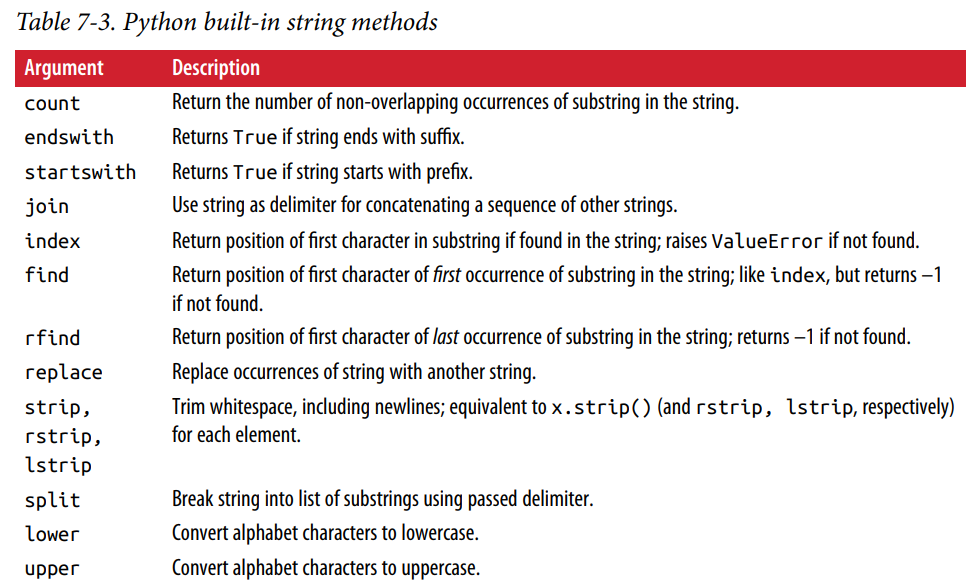

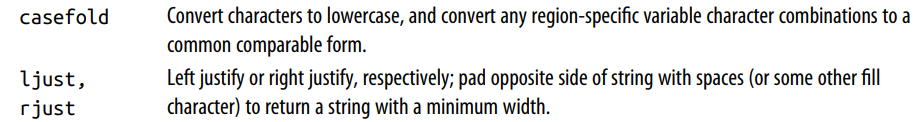

In [44]:
val.startswith('a')

True

In [46]:
print(val.endswith('o'))
print(val.endswith('w'))

True
False


### b) Regular Expressions :

Regular expressions provide a flexible way to search or match (often more complex) string patterns in text. `A single expression, commonly called a regex, is a string formed according to the regular expression language`. Python’s built-in `re module is responsible for applying regular expressions to strings` ; I’ll give a number of examples of its use here.

###### POINT TO REMEMBER :
1)  `The re module functions fall into three categories: pattern matching, substitution, and splitting.`

2)  `Naturally these are all related; a regex describes a pattern to locate in the text, which can then be used for many purposes .`

suppose we wanted to split a string with a variable number of whitespace characters (tabs, spaces, and newlines). The regex describing one or more whitespace characters  is `\s+` :


In [54]:
import re
text = "foo bar\t baz \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

###### POINTS TO REMEMBER :

1) `When you call re.split('\s+', text), the regular expression is first compiled, and then its split     method is called on the passed text.`

2) `You can compile the regex yourself with re.compile, forming a reusable regex object.`

In [55]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

###### If, instead, you wanted to get a list of all patterns matching the regex, you can use the `findall` method:


In [60]:
re.findall('\s+',text)


[' ', '\t ', ' \t']

In [61]:
regex.findall(text)

[' ', '\t ', ' \t']

###### `NOTE` : Creating a regex object with re.compile is highly recommended if you intend to apply the same expression to many strings; doing so will save CPU cycles.

###### `match` and `search` are closely related to `findall`. While `findall returns all matches in a string`, 

###### `search returns only the first match`. More rigidly, 

###### `match only matches at the beginning of the string`.

As a less trivial example, let’s consider a block of text and a regular expression capable of identifying most email addresses:


In [69]:
regex.match(text)

In [71]:
emails = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com 
"""
emails

'Dave dave@google.com\nSteve steve@gmail.com\nRob rob@gmail.com\nRyan ryan@yahoo.com \n'

In [86]:
# It's a Regular Expression (RegEx) for email addresses

pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'  

In [87]:
# re.IGNORECASE makes the regex case-insensitive

regex = re.compile(pattern, flags=re.IGNORECASE)

In [88]:
regex.findall(emails)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

###### NOTE :
1) `search returns a special match object for the first email address in the text. For the preceding regex .` 

2) `The match object can only tell us the start and end position of the pattern in the string .`

In [93]:
m = regex.search(emails)
print(m)

<re.Match object; span=(5, 20), match='dave@google.com'>


In [94]:
emails[m.start():m.end()]


'dave@google.com'

###### regex.match returns None, as it only will match if the pattern occurs at the start of the string.

In [98]:
print(regex.match(emails))

None


###### Relatedly, sub will return a new string with occurrences of the pattern replaced by the a new string:


In [97]:
print(regex.sub('REDACTED', emails))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED 



Suppose you wanted to find email addresses and simultaneously segment each address into its three components: `username`, `domain name`, and `domain suffix`. To do this, put parentheses around the parts of the pattern to segment:


In [99]:
pattern1 = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern1, flags=re.IGNORECASE)


In [102]:
print("OLD PATTERN : " ,pattern)
print("\nNEW PATTERN : " ,pattern1)

OLD PATTERN :  [A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}

NEW PATTERN :  ([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})


###### A match object produced by this modified regex returns a tuple of the pattern components with its groups method:


In [103]:
m = regex.match('wesm@bright.net')
m

<re.Match object; span=(0, 15), match='wesm@bright.net'>

In [105]:
m.groups()

('wesm', 'bright', 'net')

###### findall returns a list of tuples when the pattern has groups:


In [106]:
regex.findall(emails)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [107]:
emails

'Dave dave@google.com\nSteve steve@gmail.com\nRob rob@gmail.com\nRyan ryan@yahoo.com \n'

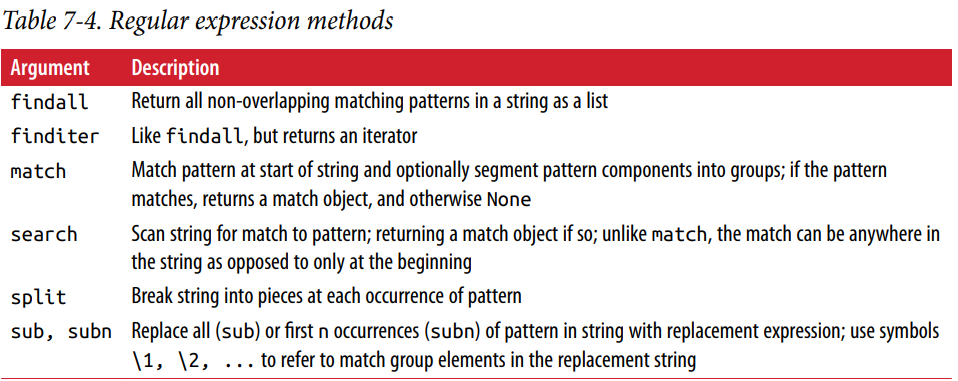

### c) Vectorized String Functions in pandas :

In [108]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [109]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

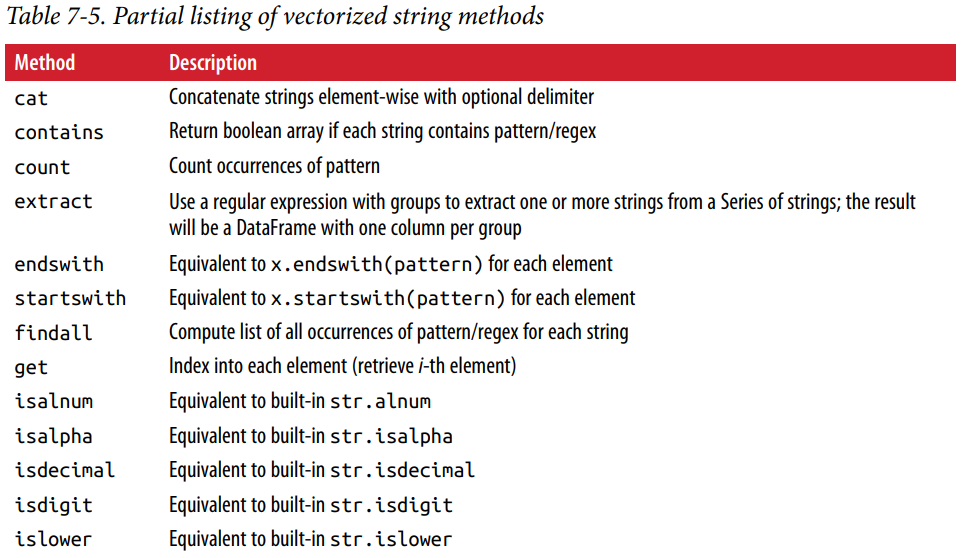

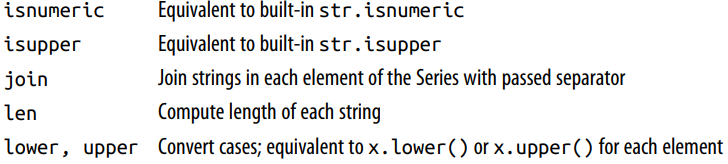

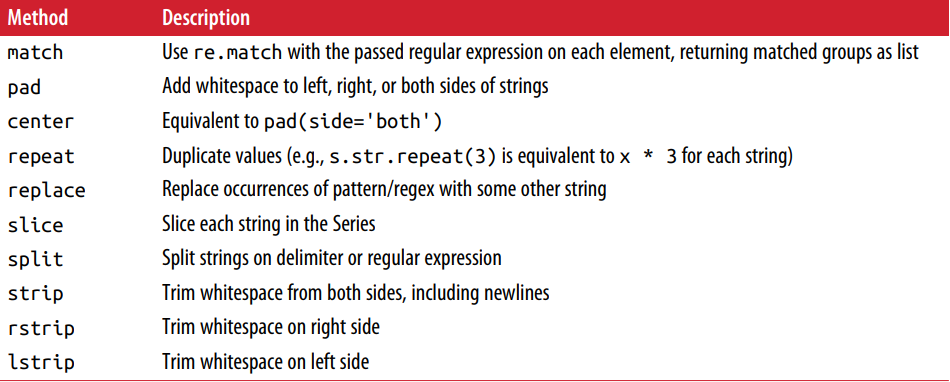

### 7.4 Conclusion
Effective data preparation can significantly improve productive by enabling you to spend more time analyzing data and less time getting it ready for analysis. We have explored a number of tools in this chapter, but the coverage here is by no means comprehensive. In the next chapter, we will explore pandas’s joining and grouping functionality .